# **ทำการติดตั้ง Packages ที่จำเป็น**

In [ ]:
pip install tensorflowjs

In [ ]:
pip install graphviz

In [ ]:
from tensorflow.keras.layers import Dense, Flatten, Conv2D, Dropout, Activation, BatchNormalization, MaxPooling2D
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
import tensorflow as tf
import tensorflow as tfjs
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.python.keras.models import load_model
from sklearn.model_selection import train_test_split
import pandas as pd
import matplotlib.pyplot as plt
import plotly.graph_objs as go

from keras.callbacks import ModelCheckpoint
from sklearn.datasets import make_circles
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import cohen_kappa_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import confusion_matrix

# Mounted Google Drive



In [ ]:
from google.colab import drive #case mounted gdrive
drive.mount('/content/gdrive', force_remount=False)

In [ ]:
import os  #case connect via OS
os.chdir("/content/gdrive/")
os.getcwd()

# สร้างตัวแปร List X , y สำหรับใส่ข้อมูลรูปภาพและคำเฉลย

In [ ]:
from tensorflow.keras.utils import load_img
from tensorflow.keras.utils import img_to_array
from PIL import Image

X =  []
y = []

# กำหนดชื่อคลาสแต่ละคลาส

In [ ]:
class_name = ["Real", "Fake"]

# นำเข้าข้อมูลรูปภาพ ธนบัตรจริง แล้วมาแปลงให้เป็น Array



In [ ]:
path_Real = "/content/gdrive/MyDrive/Colab Notebooks/Banknote/Real banknote"
files_Real = os.listdir(path_Real)

for filename in files_Real:
    print(path_Real+"/"+filename)

    img = load_img(path_Real+"/"+filename)

    img_array = img_to_array(img)

    X.append(img_array)
    y.append([1, 0])

# นำเข้าข้อมูลรูปภาพ ธนบัตรปลอม แล้วมาแปลงให้เป็น Array

In [ ]:
path_Fake = "/content/gdrive/MyDrive/Colab Notebooks/Banknote/Fake banknote"
files_Fake = os.listdir(path_Fake)

for filename in files_Fake:
    print(path_Fake+"/"+filename)

    img = load_img(path_Fake+"/"+filename)

    img_array = img_to_array(img)

    X.append(img_array)
    y.append([0, 1])

#นำตัวแปร List X , y มาทำให้เป็น Array

In [ ]:
import numpy as np
X = np.array(X)
y = np.array(y)

#ทำการกำหนดรูปแบบของตัวแปร X เป็น 4 มิติ โดยแต่ละมิติเท่ากับ 200x200x3

In [ ]:
X = X.reshape(len(y),200,200,3)
x_vector = 200*200*3

# เอาข้อมูลรูปภาพมา Plot Graph

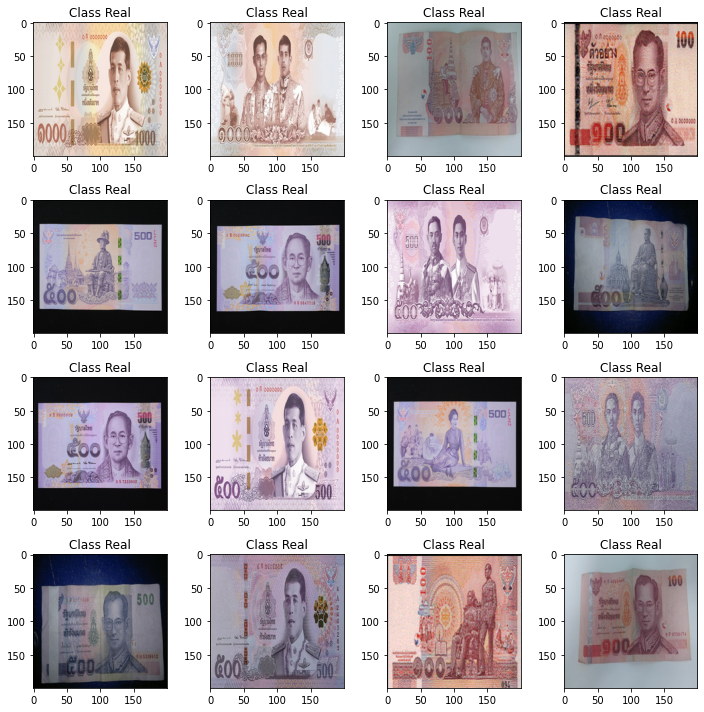

In [ ]:
plt.rcParams['figure.figsize'] = (10,10)

# นำข้อมูลใน Dataset ออกมาแสดง แค่ 16 ตัวโดยจะแสดงเป็น 4 แถว 4 คอลัม
for i in range(16):
    plt.subplot(4,4,i+1)
    img_array = X[i]
    plt.imshow(np.uint8(img_array))
    cl = np.argmax(y[i])
    plt.title("Class {}".format(class_name[cl]))

plt.tight_layout()

#แบ่งชุดข้อมูล Train , Test อัตราส่วน 80 : 20

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(
            X, y, test_size=0.20, random_state=1000)
print("X_train shape", X_train.shape)
print("y_train shape", y_train.shape)
print("X_test shape", X_test.shape)
print("y_test shape", y_test.shape)

X_train shape (800, 200, 200, 3)
y_train shape (800, 2)
X_test shape (200, 200, 200, 3)
y_test shape (200, 2)


# กำหนดจำนวนของคลาส

In [ ]:
nb_classes = 2 # number of unique classes

#Normalization

In [ ]:
X_train= X_train / 255.0

X_test = X_test / 255.0

# Custom Model CNN

In [ ]:
from tensorflow.python.keras.models import Sequential
from tensorflow.python.keras.layers import Dense, Flatten, Conv2D, Dropout, MaxPooling2D

model = Sequential()
# Add convolution 2D
model.add(Conv2D(128, kernel_size=(3,3),
                 activation='relu',
                 padding='same',
                 input_shape=(200,200, 3)))
model.add(MaxPooling2D((3,3)))
model.add(Dropout(0.25))

model.add(Conv2D(64,
                 kernel_size=(3,3),
                 padding='same',
                 activation='relu'))
model.add(MaxPooling2D(pool_size=(3,3)))
model.add(Dropout(0.25))

model.add(Conv2D(32,
                 kernel_size=(3,3),
                 padding='same',
                 activation='relu'))
model.add(MaxPooling2D(pool_size=(3,3)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(16, activation='relu'))
model.add(Dropout(0.25))
model.add(Dense(2, activation='softmax'))
model.summary()


Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 200, 200, 128)     3584      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 66, 66, 128)       0         
_________________________________________________________________
dropout (Dropout)            (None, 66, 66, 128)       0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 66, 66, 64)        73792     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 22, 22, 64)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 22, 22, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 22, 22, 32)        1

#Compile Model

In [ ]:
model.compile(optimizer='adam',  loss='binary_crossentropy',  metrics=['accuracy'])

#Fit Model

In [ ]:
history = model.fit(X_train, y_train, batch_size=20, epochs = 50, validation_data=(X_test, y_test))

Epoch 1/50
40/40 [==============================] - 148s 4s/step - loss: 0.6413 - accuracy: 0.6513 - val_loss: 0.5441 - val_accuracy: 0.7950
Epoch 2/50
40/40 [==============================] - 133s 3s/step - loss: 0.4721 - accuracy: 0.7925 - val_loss: 0.3912 - val_accuracy: 0.8350
Epoch 3/50
40/40 [==============================] - 125s 3s/step - loss: 0.3904 - accuracy: 0.8313 - val_loss: 0.3718 - val_accuracy: 0.8550
Epoch 4/50
40/40 [==============================] - 124s 3s/step - loss: 0.3494 - accuracy: 0.8512 - val_loss: 0.3424 - val_accuracy: 0.8600
Epoch 5/50
40/40 [==============================] - 125s 3s/step - loss: 0.3313 - accuracy: 0.8575 - val_loss: 0.3098 - val_accuracy: 0.8750
Epoch 6/50
40/40 [==============================] - 136s 3s/step - loss: 0.2944 - accuracy: 0.8763 - val_loss: 0.2700 - val_accuracy: 0.9100
Epoch 7/50
40/40 [==============================] - 125s 3s/step - loss: 0.2464 - accuracy: 0.9013 - val_loss: 0.2456 - val_accuracy: 0.9000
Epoch 8/50
40

#Show Train Loss & Accuracy

In [ ]:
score_train = model.evaluate(X_train, y_train, verbose = 0)
print('Train loss : ', score_train[0])
print('Train accuracy : ',score_train[1])

Train loss :  0.005831971764564514
Train accuracy :  1.0


#Show Test Loss & Accuracy

In [ ]:
score_test = model.evaluate(X_test, y_test, verbose = 0)
print('Test loss : ', score_test[0])
print('Test accuracy : ', score_test[1])

Test loss :  0.1376541554927826
Test accuracy :  0.9850000143051147


#Plot Graph Loss & Accuracy of Train Test
Graph จากการ Run Model ครั้งล่าสุด
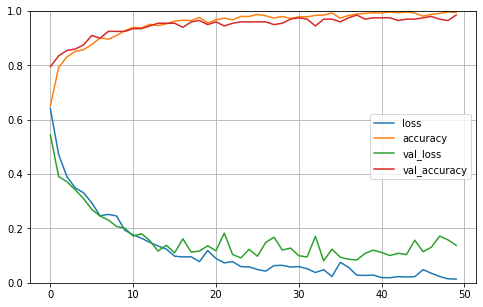


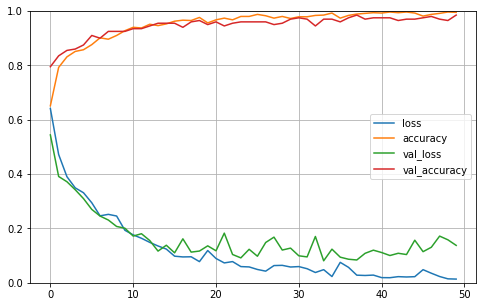

In [ ]:
pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()

In [ ]:
import matplotlib.pyplot as plt
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, color='red', label='Training loss')
plt.plot(epochs, val_loss, color='green', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
plt.plot(epochs, acc, color='red', label='Training acc')
plt.plot(epochs, val_acc, color='green', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

#Show Model Visualize

In [ ]:
pip install visualkeras

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 992.0/992.0 KB 19.7 MB/s eta 0:00:00


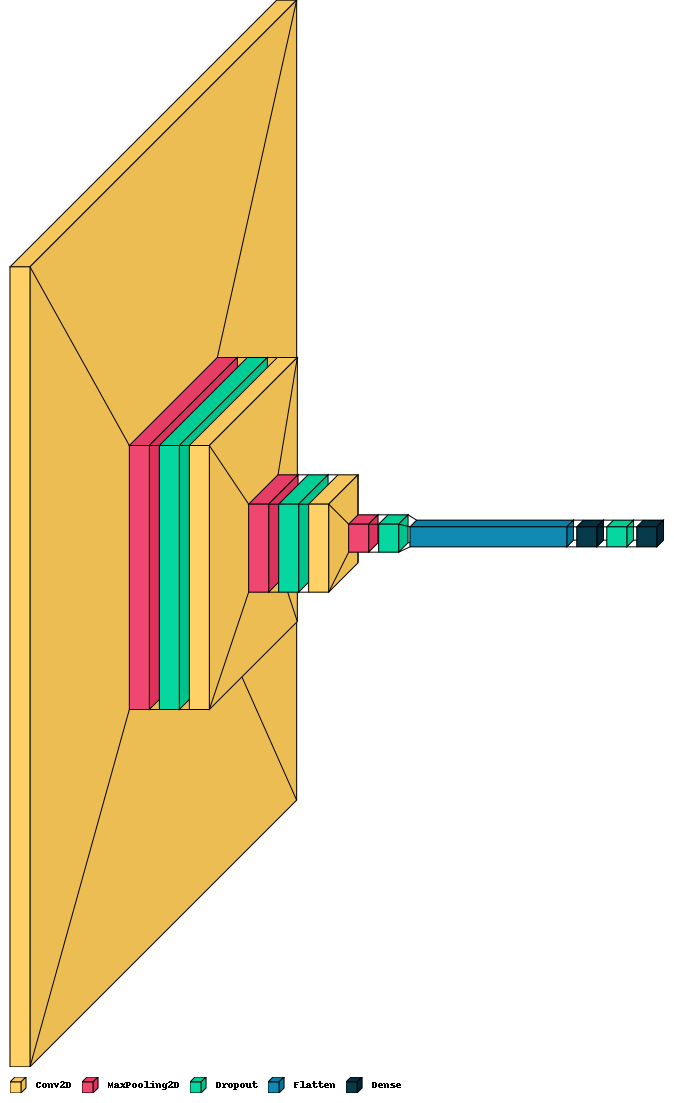

In [ ]:
import visualkeras
visualkeras.layered_view(model)
from tensorflow.keras import layers
from collections import defaultdict
color_map = defaultdict(dict)
color_map[layers.Conv2D]['fill'] = '#00f5d4'
color_map[layers.MaxPooling2D]['fill'] = '#8338ec'
color_map[layers.Dropout]['fill'] = '#03045e'
color_map[layers.Dense]['fill'] = '#fb5607'
color_map[layers.Flatten]['fill'] = '#ffbe0b'
visualkeras.layered_view(model, legend=True,color_map=color_map)

#Classification Report

In [ ]:
val_pred = model.predict(X_test)
val_pred_classes = np.argmax(val_pred, axis=1)
val_true_classes = np.argmax(y_test, axis=1)

              precision    recall  f1-score   support

           0       0.97      1.00      0.98        94
           1       1.00      0.97      0.99       106

    accuracy                           0.98       200
   macro avg       0.98      0.99      0.98       200
   
   weighted avg       0.99      0.98      0.99       200

จากการ Run Model ครั้งล่าสุด

In [ ]:
from sklearn.metrics import classification_report
report = classification_report(val_true_classes, val_pred_classes)
print(report)

              precision    recall  f1-score   support

           0       0.97      1.00      0.98        94
           1       1.00      0.97      0.99       106

    accuracy                           0.98       200
   macro avg       0.98      0.99      0.98       200
weighted avg       0.99      0.98      0.99       200



In [ ]:
from keras.callbacks import ModelCheckpoint
from sklearn.datasets import make_circles
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import cohen_kappa_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import confusion_matrix

Accuracy: 0.985000

Precision: 1.000000

Recall: 0.971698

F1 score: 0.985646

Run ครั้งล่าสุด

In [ ]:
accuracy = accuracy_score(val_true_classes, val_pred_classes)
print('Accuracy: %f' % accuracy)

precision = precision_score(val_true_classes, val_pred_classes)
print('Precision: %f' % precision)

recall = recall_score(val_true_classes, val_pred_classes)
print('Recall: %f' % recall)

f1 = f1_score(val_true_classes, val_pred_classes)
print('F1 score: %f' % f1)

Accuracy: 0.985000
Precision: 1.000000
Recall: 0.971698
F1 score: 0.985646


In [ ]:
kappa = cohen_kappa_score(val_true_classes, val_pred_classes)
print('Cohens kappa: %f' % kappa)
# ROC AUC
auc = roc_auc_score(val_true_classes, val_pred_classes)
print('ROC AUC: %f' % auc)
# confusion matrix
matrix = confusion_matrix(val_true_classes, val_pred_classes)
print(matrix)

Cohens kappa: 0.969946
ROC AUC: 0.985849
[[ 94   0]
 [  3 103]]


#ทำการ Predict กับข้อมูลชุด Test Set

In [ ]:
yhat_probs = model.predict(X_test, verbose=0)
# predict crisp classes for test set
yhat_classes = np.argmax(yhat_probs, axis=1)
yhat_probs = yhat_probs[:, 0] # ใช้เฉพาะคอลัมน์แรก
yhat_classes = yhat_classes

In [ ]:
test_predict = tf.keras.Sequential([model,tf.keras.layers.Softmax()])
result = test_predict.predict(X_test)
for i in range(20):
  print(class_name[int(np.argmax(result[i]))])

7/7 [==============================] - 15s 2s/step
Fake
Fake
Real
Real
Fake
Fake
Fake
Real
Fake
Fake
Fake
Fake
Real
Real
Real
Fake
Fake
Fake
Real
Fake


(200, 200, 200, 3)


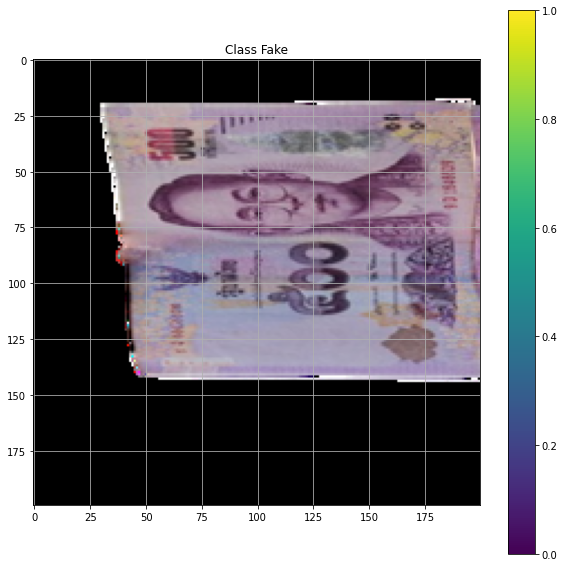

In [ ]:
test_img = np.squeeze(X_test[8])
print(X_test.shape)
plt.figure()
plt.imshow(test_img)
plt.colorbar()
cl = np.argmax(result[8])
plt.title("Class {}".format(class_name[cl]))
plt.grid(True)
plt.show()

#Save Model

In [ ]:
#model.save("/content/gdrive/MyDrive/Colab Notebooks/Classifiled_Banknote/banknote.h5")
print("Saved model.")

Saved model.
